In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as osm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from pyproj import Transformer
from shapely.geometry import *
import networkx as nx


In [44]:
stations = pd.read_json('../Data/01_Raw_Data/stations.json')
stations

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [3]:
# get the metro stations
osm.config(use_cache=False,
          log_console=True,
          useful_tags_way=osm.settings.useful_tags_way + ['railway'])

G = osm.graph_from_place('London, UK',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        custom_filter='["railway"~"tram|rail"]')

/var/folders/0m/swmphxyn7jncj7fk8v1qrj5c0000gn/T/ipykernel_57742/2107164356.py:2: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  osm.config(use_cache=False,


In [6]:
geo_data_frame = osm.graph_to_gdfs(G, nodes=False, edges=True, node_geometry=False, fill_edge_geometry=True)
geo_data_frame

osmid  \
u           v           key                                                 
818229      3530749593  0                          [346568250, 346568251]   
1143487     1658249090  0                                       729691666   
            6295424141  0                                       153083830   
            1655787201  0              [501004827, 1149878556, 795279563]   
1143654     2651076977  0    [732443273, 259671950, 732904950, 703474903]   
...                                                                   ...   
12075414464 12075414417 0                            [44579677, 44509526]   
            12075414466 0                                      1303912004   
12075414466 12075414391 0                                        44579678   
            12075414370 0                                        44579678   
            12075414464 0                                      1303912004   

                              ref                                   name  \
u           v           key                                                
818229      3530749593  0     CJC  Clapton Junction and Chingford Branch   
1143487     1658249090  0    MLN1                Great Western main line   
            6295424141  0     NaN                    Paddington New Yard   
            1655787201  0    MLN1                         Elizabeth Line   
1143654     2651076977  0    MLN1                Great Western Main Line   
...                           ...                                    ...   
12075414464 12075414417 0     NaN                     Ferme Park Sidings   
            12075414466 0     NaN                                    NaN   
12075414466 12075414391 0     NaN                     Ferme Park Sidings   
            12075414370 0     NaN                     Ferme Park Sidings   
            12075414464 0     NaN                                    NaN   

                            railway  oneway       reversed   length maxspeed  \
u           v           key                                                    
818229      3530749593  0      rail   False           True  203.890   15 mph   
1143487     1658249090  0      rail   False           True   89.078      NaN   
            6295424141  0      rail   False          False  278.382      NaN   
            1655787201  0      rail   False          False  831.854   50 mph   
1143654     2651076977  0      rail   False           True  449.081   40 mph   
...                             ...     ...            ...      ...      ...   
12075414464 12075414417 0      rail   False  [False, True]  549.172      NaN   
            12075414466 0      rail   False          False   58.664      NaN   
12075414466 12075414391 0      rail   False          False   31.649      NaN   
            12075414370 0      rail   False           True   42.621      NaN   
            12075414464 0      rail   False           True   58.664      NaN   

                                                                      geometry  \
u           v           key                                                      
818229      3530749593  0    LINESTRING (0.01011 51.63319, 0.01003 51.63311...   
1143487     1658249090  0    LINESTRING (-0.20426 51.52219, -0.20543 51.52252)   
            6295424141  0    LINESTRING (-0.20426 51.52219, -0.20394 51.522...   
            1655787201  0    LINESTRING (-0.20426 51.52219, -0.20330 51.521...   
1143654     2651076977  0    LINESTRING (-0.17700 51.51659, -0.17710 51.516...   
...                                                                        ...   
12075414464 12075414417 0    LINESTRING (-0.11110 51.58604, -0.11104 51.585...   
            12075414466 0    LINESTRING (-0.11110 51.58604, -0.11118 51.586...   
12075414466 12075414391 0    LINESTRING (-0.11127 51.58655, -0.11120 51.586...   
            12075414370 0    LINESTRING (-0.11127 51.58655, -0.11132 51.586...   
            12075414464 0    LINESTRING (-0.11127 51

In [13]:
# Define the place name or the bounding box for London
place_name = "London, UK"

# Fetch all amenities and features in London
gdf = osm.geometries_from_place(place_name, tags={'public_transport': 'station'})

# Filter the DataFrame to include only Tube stations
# Note: subway_entrance is used for entrances; 'station' might be needed if you want all stations
tube_stations = gdf[gdf['subway'] == 'yes']


/var/folders/0m/swmphxyn7jncj7fk8v1qrj5c0000gn/T/ipykernel_57742/1348916556.py:5: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  gdf = osm.geometries_from_place(place_name, tags={'public_transport': 'station'})


In [39]:
gdf

geometry  \
element_type osmid                                                           
node         780856                              POINT (-0.22631 51.50607)   
             1256794                             POINT (-0.47183 51.50974)   
             2013971                             POINT (-0.19232 51.60084)   
             9780241                              POINT (0.10572 51.39474)   
             13884199                            POINT (-0.24880 51.61267)   
...                                                                    ...   
way          995313288   POLYGON ((-0.22341 51.49287, -0.22347 51.49284...   
             1155214934  POLYGON ((-0.19525 51.57187, -0.19541 51.57190...   
             1197183933  POLYGON ((0.21551 51.54549, 0.21535 51.54523, ...   
             1226033188  POLYGON ((-0.04520 51.41205, -0.04522 51.41204...   
relation     5202142     POLYGON ((0.12964 51.56814, 0.12966 51.56805, ...   

                        fare_zone                       line  \
element_type osmid                                             
node         780856             2  Hammersmith & City;Circle   
             1256794            6                        NaN   
             2013971            4                   Northern   
             9780241          NaN                        NaN   
             13884199         NaN                        NaN   
...                           ...                        ...   
way          995313288        NaN                        NaN   
             1155214934       NaN                        NaN   
             1197183933       NaN                        NaN   
             1226033188       NaN                        NaN   
relation     5202142          NaN                        NaN   

                                                  name             name:ru  \
element_type osmid                                                           
node         780856             Shepherd's Bush Market  Шепердс-Буш-Маркет   
             1256794                      West Drayton                 NaN   
             2013971                  Finchley Central                 NaN   
             9780241                      St Mary Cray                 NaN   
             13884199               Mill Hill Broadway                 NaN   
...                                                ...                 ...   
way          995313288   Hammersmith Lower Bus Station                 NaN   
             1155214934                  Golders Green                 NaN   
             1197183933   256 Bus route terminus/layby                 NaN   
             1226033188                     Kent House                 NaN   
relation     5202142                               NaN                 NaN   

                        naptan:AtcoCode                       network  \
element_type osmid                                                      
node         780856         940GZZLUSBM            London Underground   
             1256794        9100WDRYTON  National Rail;Elizabeth Line   
             2013971        940GZZLUFYC            London Underground   
             9780241         9100STMRYC                 National Rail   
             13884199          9100MLHB                 National Rail   
...                                 ...                           ...   
way          995313288              NaN                           NaN   
             1155214934             NaN                           NaN   
             1197183933             NaN                 256 Bus Route   
             1226033188             NaN                           NaN   
relation     5202142                NaN                           NaN   

                        public_transport  railway  \
element_type osmid                                  
node         780856              station  station   
             1256794             station  station   
             2013971             station 

In [19]:
osm.project_gdf(tube_stations)

geometry fare_zone  \
element_type osmid                                                  
node         780856      POINT (692486.730 5709752.088)         2   
             2013971     POINT (694440.801 5720378.498)         4   
             15026054    POINT (697433.807 5708400.597)         1   
             18089211    POINT (694302.038 5700468.463)         3   
             19135534    POINT (682673.194 5718194.918)         5   
...                                                 ...       ...   
             6797794418  POINT (701717.588 5709569.260)         1   
             6932246807  POINT (704295.545 5712571.681)         2   
             7175566127  POINT (687414.502 5714712.534)         4   
             9097860107  POINT (699303.570 5707132.640)         1   
             9097860108  POINT (698384.289 5707033.381)         1   

                                              line                     name  \
element_type osmid                                                            
node         780856      Hammersmith & City;Circle   Shepherd's Bush Market   
             2013971                      Northern         Finchley Central   
             15026054              District;Circle            Sloane Square   
             18089211                     District                Wimbledon   
             19135534                 Metropolitan             North Harrow   
...                                            ...                      ...   
             6797794418                   Northern                  Borough   
             6932246807                    Central            Bethnal Green   
             7175566127                   Bakerloo          Wembley Central   
             9097860107                   Northern                Nine Elms   
             9097860108                   Northern  Battersea Power Station   

                                    name:ru naptan:AtcoCode  \
element_type osmid                                            
node         780856      Шепердс-Буш-Маркет     940GZZLUSBM   
             2013971                    NaN     940GZZLUFYC   
             15026054           Слоун-сквер     940GZZLUSSQ   
             18089211              Уимблдон     9100WIMBLDN   
             19135534                   NaN     940GZZLUNHA   
...                                     ...             ...   
             6797794418                Боро     940GZZLUBOR   
             6932246807         Бэтнал-грин     940GZZLUBLG   
             7175566127                 NaN        9100WMBY   
             9097860107                 NaN    940GZZNEUGST   
             9097860108                 NaN    940GZZBPSUST   

                                                                   network  \
element_type osmid                                                           
node         780856                                     London Underground   
             2013971                                    London Underground   
             15026054                                   London Underground   
             18089211        National Rail;London Underground;London Trams   
             19135534                                   London Underground   
...                                                                    ...   
             6797794418                                 London Underground   
             6932246807                                 London Underground   
             7175566127  National Rail;London Underground;London Overgr...   
             9097860107                                 London Underground   
             9097860108                                 London Underground   

                        public_transport  railway  \
element_type osmid                                  
node         780856              station  station   
             2013971             station  station   
             15026054            station  station   
             18089211

In [20]:
tube_stations

geometry fare_zone  \
element_type osmid                                             
node         780856      POINT (-0.22631 51.50607)         2   
             2013971     POINT (-0.19232 51.60084)         4   
             15026054    POINT (-0.15588 51.49223)         1   
             18089211    POINT (-0.20529 51.42207)         3   
             19135534    POINT (-0.36318 51.58516)         5   
...                                            ...       ...   
             6797794418  POINT (-0.09358 51.50121)         1   
             6932246807  POINT (-0.05475 51.52724)         2   
             7175566127  POINT (-0.29668 51.55233)         4   
             9097860107  POINT (-0.12969 51.48018)         1   
             9097860108  POINT (-0.14297 51.47962)         1   

                                              line                     name  \
element_type osmid                                                            
node         780856      Hammersmith & City;Circle   Shepherd's Bush Market   
             2013971                      Northern         Finchley Central   
             15026054              District;Circle            Sloane Square   
             18089211                     District                Wimbledon   
             19135534                 Metropolitan             North Harrow   
...                                            ...                      ...   
             6797794418                   Northern                  Borough   
             6932246807                    Central            Bethnal Green   
             7175566127                   Bakerloo          Wembley Central   
             9097860107                   Northern                Nine Elms   
             9097860108                   Northern  Battersea Power Station   

                                    name:ru naptan:AtcoCode  \
element_type osmid                                            
node         780856      Шепердс-Буш-Маркет     940GZZLUSBM   
             2013971                    NaN     940GZZLUFYC   
             15026054           Слоун-сквер     940GZZLUSSQ   
             18089211              Уимблдон     9100WIMBLDN   
             19135534                   NaN     940GZZLUNHA   
...                                     ...             ...   
             6797794418                Боро     940GZZLUBOR   
             6932246807         Бэтнал-грин     940GZZLUBLG   
             7175566127                 NaN        9100WMBY   
             9097860107                 NaN    940GZZNEUGST   
             9097860108                 NaN    940GZZBPSUST   

                                                                   network  \
element_type osmid                                                           
node         780856                                     London Underground   
             2013971                                    London Underground   
             15026054                                   London Underground   
             18089211        National Rail;London Underground;London Trams   
             19135534                                   London Underground   
...                                                                    ...   
             6797794418                                 London Underground   
             6932246807                                 London Underground   
             7175566127  National Rail;London Underground;London Overgr...   
             9097860107                                 London Underground   
             9097860108                                 London Underground   

                        public_transport  railway  \
element_type osmid                                  
node         780856              station  station   
             2013971             station  station   
             15026054            station  station   
             18089211            station  station   
             19135534       

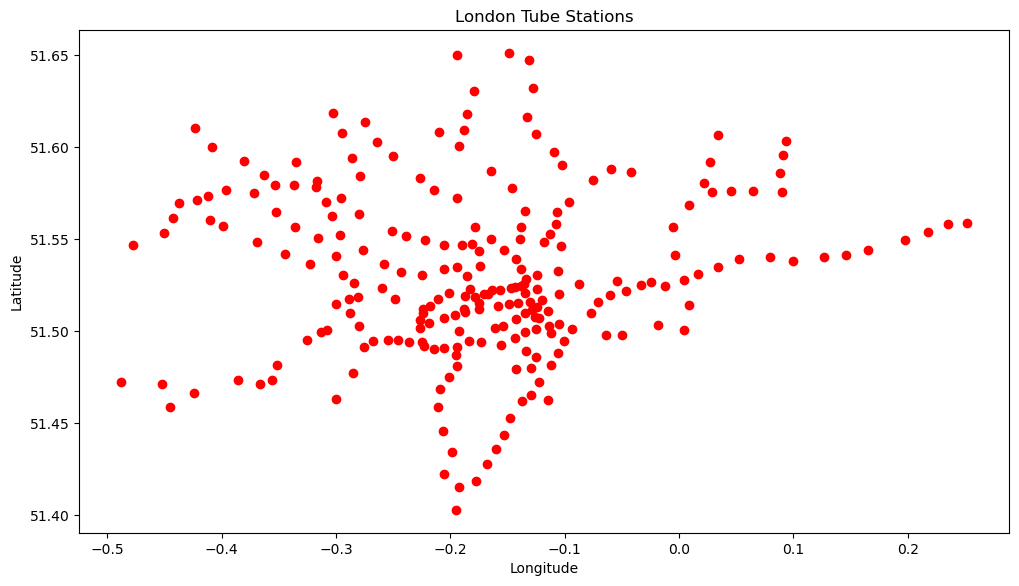

In [28]:
# Plot the Tube stations

ax = tube_stations.plot(marker='o', color='red', figsize=(12, 12))
plt.title('London Tube Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [16]:
central_london = osm.io.load_graphml('../Data/02_Processed_Data/Central_london.osm')

In [29]:
osm.project_graph(central_london)

In [36]:
# Get the CRS of the projected graph
crs_proj = central_london.graph['crs']

# Create a transformer to convert lat/lon to the projected CRS
transformer = Transformer.from_crs("epsg:4326", crs_proj, always_xy=True)

# Get the coordinates of the first node
node1 = list(central_london.nodes(data=True))[0]

# Tranform the gpd to the projected CRS
tube_stations_proj = tube_stations.to_crs(crs_proj)

tube_stations_proj

geometry fare_zone  \
element_type osmid                                                  
node         780856      POINT (692486.730 5709752.088)         2   
             2013971     POINT (694440.801 5720378.498)         4   
             15026054    POINT (697433.807 5708400.597)         1   
             18089211    POINT (694302.038 5700468.463)         3   
             19135534    POINT (682673.194 5718194.918)         5   
...                                                 ...       ...   
             6797794418  POINT (701717.588 5709569.260)         1   
             6932246807  POINT (704295.545 5712571.681)         2   
             7175566127  POINT (687414.502 5714712.534)         4   
             9097860107  POINT (699303.570 5707132.640)         1   
             9097860108  POINT (698384.289 5707033.381)         1   

                                              line                     name  \
element_type osmid                                                            
node         780856      Hammersmith & City;Circle   Shepherd's Bush Market   
             2013971                      Northern         Finchley Central   
             15026054              District;Circle            Sloane Square   
             18089211                     District                Wimbledon   
             19135534                 Metropolitan             North Harrow   
...                                            ...                      ...   
             6797794418                   Northern                  Borough   
             6932246807                    Central            Bethnal Green   
             7175566127                   Bakerloo          Wembley Central   
             9097860107                   Northern                Nine Elms   
             9097860108                   Northern  Battersea Power Station   

                                    name:ru naptan:AtcoCode  \
element_type osmid                                            
node         780856      Шепердс-Буш-Маркет     940GZZLUSBM   
             2013971                    NaN     940GZZLUFYC   
             15026054           Слоун-сквер     940GZZLUSSQ   
             18089211              Уимблдон     9100WIMBLDN   
             19135534                   NaN     940GZZLUNHA   
...                                     ...             ...   
             6797794418                Боро     940GZZLUBOR   
             6932246807         Бэтнал-грин     940GZZLUBLG   
             7175566127                 NaN        9100WMBY   
             9097860107                 NaN    940GZZNEUGST   
             9097860108                 NaN    940GZZBPSUST   

                                                                   network  \
element_type osmid                                                           
node         780856                                     London Underground   
             2013971                                    London Underground   
             15026054                                   London Underground   
             18089211        National Rail;London Underground;London Trams   
             19135534                                   London Underground   
...                                                                    ...   
             6797794418                                 London Underground   
             6932246807                                 London Underground   
             7175566127  National Rail;London Underground;London Overgr...   
             9097860107                                 London Underground   
             9097860108                                 London Underground   

                        public_transport  railway  \
element_type osmid                                  
node         780856              station  station   
             2013971             station  station   
             15026054            station  station   
             18089211

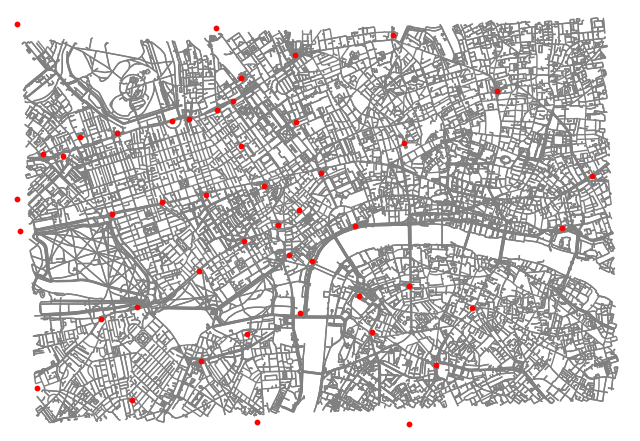

In [38]:
fix, ax = osm.plot_graph(central_london, node_size=3, bgcolor="none", edge_color="grey", node_color="none", show=False, close=False)
tube_stations_proj.plot(ax=ax, color='red', markersize=10)
plt.show()

In [41]:
# Define the place name and the specific tags for the London Underground stations
place_name = "London, United Kingdom"
tags = {"railway": "station", "subway": "yes"}

# Download data for London Underground stations
stations = osm.geometries_from_place(place_name, tags)

# Display the stations
stations_df = stations[['name', 'geometry']].reset_index()

# Display the DataFrame
print(stations_df)

/var/folders/0m/swmphxyn7jncj7fk8v1qrj5c0000gn/T/ipykernel_57742/795960548.py:6: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  stations = osm.geometries_from_place(place_name, tags)


     element_type     osmid                        name  \
0            node    780856      Shepherd's Bush Market   
1            node   1256794                West Drayton   
2            node   2013971            Finchley Central   
3            node   2013985      Totteridge & Whetstone   
4            node   7993108                 Hanger Lane   
...           ...       ...                         ...   
1705     relation   8151301                         NaN   
1706     relation   9582150  Stratford Platforms 3 & 3a   
1707     relation  12909313                         NaN   
1708     relation  12909314                         NaN   
1709     relation  12912866                     Pimlico   

                                               geometry  
0                             POINT (-0.22631 51.50607)  
1                             POINT (-0.47183 51.50974)  
2                             POINT (-0.19232 51.60084)  
3                             POINT (-0.17913 51.63037)  
4

In [42]:
stations_df

,element_type,osmid,name,geometry
0,node,780856,Shepherd's Bush Market,POINT (-0.22631 51.50607)
1,node,1256794,West Drayton,POINT (-0.47183 51.50974)
2,node,2013971,Finchley Central,POINT (-0.19232 51.60084)
3,node,2013985,Totteridge & Whetstone,POINT (-0.17913 51.63037)
4,node,7993108,Hanger Lane,POINT (-0.29329 51.53030)
...,...,...,...,...
1705,relation,8151301,NaN,"POLYGON ((-0.10307 51.59051, -0.10318 51.59058..."
1706,relation,9582150,Stratford Platforms 3 & 3a,"MULTIPOLYGON (((-0.00309 51.54189, -0.00266 51..."
1707,relation,12909313,NaN,"POLYGON ((-0.14199 51.51534, -0.14201 51.51534..."
1708,relation,12909314,NaN,"POLYGON ((-0.14208 51.51606, -0.14203 51.51606..."


# Tourism

In [47]:
gdf_tourism = osm.geometries_from_place(place_name, tags={'tourism': 'attraction'})
gdf_tourism

/var/folders/0m/swmphxyn7jncj7fk8v1qrj5c0000gn/T/ipykernel_57742/4203721168.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  gdf_tourism = osm.geometries_from_place(place_name, tags={'tourism': 'attraction'})


access barrier bicycle                      name place  \
element_type osmid                                                              
node         26559743     NaN     NaN     NaN                       NaN   NaN   
             252602371    NaN     NaN     NaN  London Bridge Experience   NaN   
             269236138    NaN     NaN     NaN      Little Holland House   NaN   
             293221901    NaN     NaN     NaN    Hall Place and Gardens   NaN   
             321506811    NaN     NaN     NaN           St Pancras Lock   NaN   
...                       ...     ...     ...                       ...   ...   
relation     8048634      NaN     NaN     NaN            Chiswick House   NaN   
             8244923      NaN     NaN     NaN        Little Dean's Yard   NaN   
             8250949      NaN     NaN     NaN         Piccadilly Circus   NaN   
             12942436     NaN     NaN     NaN           Wembley Stadium   NaN   
             16771773     NaN     NaN     NaN            Red river hogs   NaN   

                                                                 geometry  \
element_type osmid                                                          
node         26559743                           POINT (-0.14525 51.39520)   
             252602371                          POINT (-0.08826 51.50639)   
             269236138                          POINT (-0.17065 51.35530)   
             293221901                           POINT (0.16023 51.44819)   
             321506811                          POINT (-0.12783 51.53621)   
...                                                                   ...   
relation     8048634    POLYGON ((-0.25857 51.48363, -0.25861 51.48360...   
             8244923    POLYGON ((-0.12759 51.49840, -0.12760 51.49835...   
             8250949    POLYGON ((-0.13466 51.50974, -0.13472 51.50982...   
             12942436   POLYGON ((-0.28036 51.55725, -0.28025 51.55727...   
             16771773   POLYGON ((-0.15437 51.53479, -0.15434 51.53478...   

                           tourism foot  wikidata    addr:street  ... name:te  \
element_type osmid                                                ...           
node         26559743   attraction  NaN       NaN            NaN  ...     NaN   
             252602371  attraction  NaN  Q7748032  Tooley Street  ...     NaN   
             269236138  attraction  NaN       NaN            NaN  ...     NaN   
             293221901  attraction  NaN  Q5642615    Bourne Road  ...     NaN   
             321506811  attraction  NaN  Q7595038            NaN  ...     NaN   
...                            ...  ...       ...            ...  ...     ...   
relation     8048634    attraction  NaN  Q1074877            NaN  ...     NaN   
             8244923    attraction  NaN  Q6649745            NaN  ...     NaN   
             8250949    attraction  NaN   Q215255            NaN  ...     NaN   
             12942436   attraction  NaN   Q128468            NaN  ...     NaN   
             16771773   attraction  NaN       NaN            NaN  ...     NaN   

                       name:tl name:tt name:yi ref:GB:uprn        name:ckb  \
element_type osmid                                                           
node         26559743      NaN     NaN     NaN         NaN             NaN   
             252602371     NaN     NaN     NaN         NaN             NaN   
             269236138     NaN     NaN     NaN         NaN             NaN   
             293221901     NaN     NaN     NaN         NaN             NaN   
             321506811     NaN     NaN     NaN         NaN             NaN   
...                        ...     ...     ...         ...             ...   
relation     8048634       NaN     NaN     NaN         NaN             NaN   
             8244923       NaN     NaN     NaN         NaN             NaN   
             8250949       NaN     NaN     NaN         NaN             NaN   
             12942436      NaN  Вембли     NaN         

In [50]:
# Transform the gdf to the projected CRS
gdf_tourism_proj = gdf_tourism.to_crs(crs_proj)


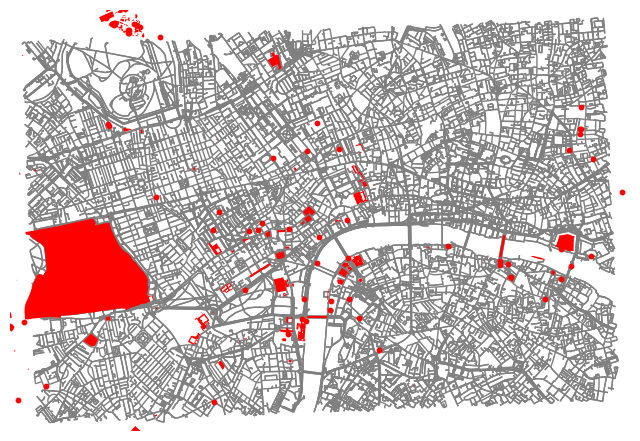

In [51]:
# Plot the Tourist Attractions
fix, ax = osm.plot_graph(central_london, node_size=3, bgcolor="none", edge_color="grey", node_color="none", show=False, close=False)
gdf_tourism_proj.plot(ax=ax, color='red', markersize=10)
plt.show()



In [52]:
station_data = pd.read_csv('../Data/02_Processed_Data/Station_data_with_community.csv')
station_data = gpd.GeoDataFrame(station_data, geometry=gpd.points_from_xy(station_data['lon'], station_data['lat'], crs='epsg:4326'))
station_data = osm.project_gdf(station_data)

In [65]:
from shapely.geometry import Point
import geopandas as gpd

# Ensure both GeoDataFrames are in the same projection
gdf_tourism_proj = gdf_tourism_proj.to_crs(station_data.crs)

# Create a buffer of 500 meters around each station
station_data['buffer'] = station_data['geometry'].buffer(500)

# Perform a spatial join to find tourist attractions within the buffer
joined_data = gpd.sjoin(gdf_tourism_proj, station_data, how='inner', op='intersects')

# 

# Group by station and count the number of tourist attractions in each buffer
attraction_counts = joined_data.groupby('index_right').size()

# Add the counts back to the station_data DataFrame
station_data['attraction_count'] = attraction_counts

# Fill NaN values with 0 (stations with no attractions nearby)
station_data['attraction_count'] = station_data['attraction_count'].fillna(0).astype(int)

# Drop the buffer column (if not needed anymore)
#station_data = station_data.drop(columns='buffer')

station_data



/Users/juliuskrug/anaconda3/envs/ox/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,commonName,lat,lon,NbDocks,geometry,Station_number,Community,attraction_count,buffer
0,"River Street , Clerkenwell",51.529163,-0.109970,19,POINT (700457.690 5712632.137),1023,1,0,"POLYGON ((700957.690 5712632.137, 700955.282 5..."
1,"Christopher Street, Liverpool Street",51.521283,-0.084605,32,POINT (702251.641 5711825.859),1012,1,0,"POLYGON ((702751.641 5711825.859, 702749.233 5..."
2,"St. Chad's Street, King's Cross",51.530059,-0.120973,23,POINT (699690.724 5712701.655),1013,0,0,"POLYGON ((700190.724 5712701.655, 700188.317 5..."
3,"Sedding Street, Sloane Square",51.493130,-0.156876,27,POINT (697360.546 5708498.365),3420,3,0,"POLYGON ((697860.546 5708498.365, 697858.138 5..."
4,"Broadcasting House, Marylebone",51.518117,-0.144228,18,POINT (698129.901 5711310.670),3424,0,0,"POLYGON ((698629.901 5711310.670, 698627.493 5..."
...,...,...,...,...,...,...,...,...,...
365,"Soho Square , Soho",51.515631,-0.132328,57,POINT (698966.191 5711066.572),1052,0,0,"POLYGON ((699466.191 5711066.572, 699463.784 5..."
366,"Upper Grosvenor Street, Mayfair",51.510130,-0.155757,18,POINT (697364.716 5710391.488),10621,0,0,"POLYGON ((697864.716 5710391.488, 697862.309 5..."
367,"Park Lane, Mayfair",51.505426,-0.150817,18,POINT (697727.817 5709881.825),300093,3,0,"POLYGON ((698227.817 5709881.825, 698225.409 5..."
368,"Pall Mall East, West End",51.507770,-0.130699,22,POINT (699113.482 5710197.001),1153,3,0,"POLYGON ((699613.482 5710197.001, 699611.075 5..."


/var/folders/0m/swmphxyn7jncj7fk8v1qrj5c0000gn/T/ipykernel_57742/2109742717.py:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


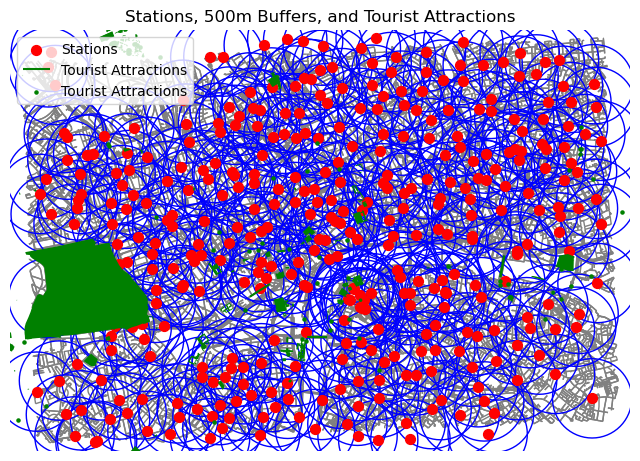

In [64]:
import matplotlib.pyplot as plt

# Plot setup
fig, ax = osm.plot_graph(central_london, node_size=3, bgcolor="none", edge_color="grey", node_color="none", show=False, close=False)


# Plot the buffers around stations
station_data['buffer'].plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=1, label='500m Buffer')

# Plot the stations
station_data.plot(ax=ax, color='red', markersize=50, label='Stations')

# Plot the tourist attractions
gdf_tourism_proj.plot(ax=ax, color='green', markersize=5, label='Tourist Attractions')

# Adding a legend
plt.legend()

# Adding a title
plt.title('Stations, 500m Buffers, and Tourist Attractions')

# Show the plot
plt.show()


/Users/juliuskrug/anaconda3/envs/ox/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/juliuskrug/anaconda3/envs/ox/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/0m/swmphxyn7jncj7fk8v1qrj5c0000gn/T/ipykernel_57742/673323593.py:40: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


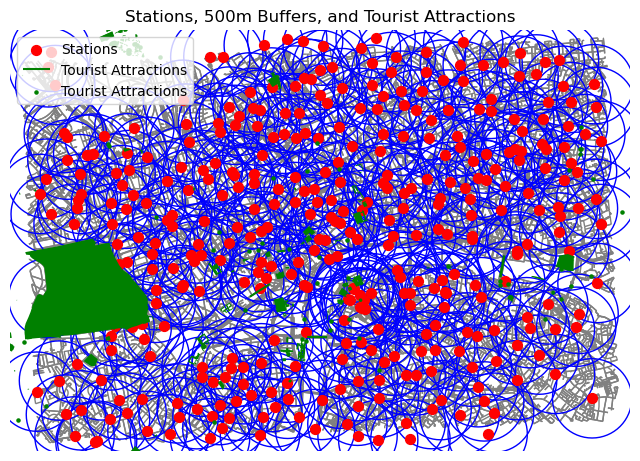

,within_count,intersects_count
0,0,0
1,0,0
2,2,3
3,1,2
4,1,1
...,...,...
365,2,2
366,2,3
367,1,2
368,17,19


In [67]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Ensure both GeoDataFrames are in the same projection
gdf_tourism_proj = gdf_tourism_proj.to_crs(station_data.crs)

# Create a buffer of 500 meters around each station
station_data['buffer'] = station_data['geometry'].buffer(500)

# Spatial join to find tourist attractions fully within the buffer
within_joined_data = gpd.sjoin(gdf_tourism_proj, station_data.set_geometry('buffer'), how='inner', op='within')
within_counts = within_joined_data.groupby('index_right').size()

# Spatial join to find tourist attractions that intersect with the buffer
intersects_joined_data = gpd.sjoin(gdf_tourism_proj, station_data.set_geometry('buffer'), how='inner', op='intersects')
intersects_counts = intersects_joined_data.groupby('index_right').size()

# Add the counts back to the station_data DataFrame
station_data['within_count'] = within_counts
station_data['intersects_count'] = intersects_counts

# Fill NaN values with 0 (stations with no attractions nearby)
station_data['within_count'] = station_data['within_count'].fillna(0).astype(int)
station_data['intersects_count'] = station_data['intersects_count'].fillna(0).astype(int)

# Plotting
fig, ax = osm.plot_graph(central_london, node_size=3, bgcolor="none", edge_color="grey", node_color="none", show=False, close=False)

# Plot the buffers around stations
station_data['buffer'].plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=1, label='500m Buffer')

# Plot the stations
station_data.plot(ax=ax, color='red', markersize=50, label='Stations')

# Plot the tourist attractions
gdf_tourism_proj.plot(ax=ax, color='green', markersize=5, label='Tourist Attractions')

# Adding a legend
plt.legend()

# Adding a title
plt.title('Stations, 500m Buffers, and Tourist Attractions')

# Show the plot
plt.show()

station_data[['within_count', 'intersects_count']]


In [68]:
station_data

,commonName,lat,lon,NbDocks,geometry,Station_number,Community,attraction_count,buffer,within_count,intersects_count
0,"River Street , Clerkenwell",51.529163,-0.109970,19,POINT (700457.690 5712632.137),1023,1,0,"POLYGON ((700957.690 5712632.137, 700955.282 5...",0,0
1,"Christopher Street, Liverpool Street",51.521283,-0.084605,32,POINT (702251.641 5711825.859),1012,1,0,"POLYGON ((702751.641 5711825.859, 702749.233 5...",0,0
2,"St. Chad's Street, King's Cross",51.530059,-0.120973,23,POINT (699690.724 5712701.655),1013,0,0,"POLYGON ((700190.724 5712701.655, 700188.317 5...",2,3
3,"Sedding Street, Sloane Square",51.493130,-0.156876,27,POINT (697360.546 5708498.365),3420,3,0,"POLYGON ((697860.546 5708498.365, 697858.138 5...",1,2
4,"Broadcasting House, Marylebone",51.518117,-0.144228,18,POINT (698129.901 5711310.670),3424,0,0,"POLYGON ((698629.901 5711310.670, 698627.493 5...",1,1
...,...,...,...,...,...,...,...,...,...,...,...
365,"Soho Square , Soho",51.515631,-0.132328,57,POINT (698966.191 5711066.572),1052,0,0,"POLYGON ((699466.191 5711066.572, 699463.784 5...",2,2
366,"Upper Grosvenor Street, Mayfair",51.510130,-0.155757,18,POINT (697364.716 5710391.488),10621,0,0,"POLYGON ((697864.716 5710391.488, 697862.309 5...",2,3
367,"Park Lane, Mayfair",51.505426,-0.150817,18,POINT (697727.817 5709881.825),300093,3,0,"POLYGON ((698227.817 5709881.825, 698225.409 5...",1,2
368,"Pall Mall East, West End",51.507770,-0.130699,22,POINT (699113.482 5710197.001),1153,3,0,"POLYGON ((699613.482 5710197.001, 699611.075 5...",17,19


In [69]:
station_data.drop(columns=['buffer','attraction_count', 'intersects_count' ], inplace=True)

In [70]:
station_data.rename(columns={'within_count': 'attraction_count'}, inplace=True)

In [71]:
station_data.to_csv('../Data/02_Processed_Data/Station_data_with_community_withAttraction.csv', index=False)